## 🧪 Exploratory Data Analysis for Customer Churn

This notebook explores customer churn behavior using a sample dataset. It includes:
- Data loading
- Missing value inspection
- Feature distributions
- Churn patterns across segments

In [15]:
# Import libraries
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("../data/customer_churn.csv")  # Make sure this file exists

# Show shape and head
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
df.head()


Dataset has 100 rows and 21 columns.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,Yes,Yes,23,No,No,DSL,Yes,...,Yes,Yes,No,No,Month-to-month,No,Electronic check,117.11,2693.53,Yes
1,CUST0001,Female,1,No,Yes,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Mailed check,114.43,8124.53,Yes
2,CUST0002,Male,1,Yes,Yes,35,No,No,DSL,Yes,...,No,Yes,No internet service,Yes,One year,Yes,Credit card,67.42,2359.70,No
3,CUST0003,Male,1,Yes,No,37,Yes,No,No,No internet service,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer,106.20,3929.40,Yes
4,CUST0004,Male,1,No,No,24,No,Yes,DSL,Yes,...,No,No,Yes,No internet service,One year,Yes,Credit card,104.45,2506.80,Yes


### 📊 Missing Value Analysis

This section checks for missing values to identify potential data quality issues.

In [16]:
# Check for missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

if not missing.empty:
    print("Missing values detected:")
    print(missing)
else:
    print("✅ No missing values found.")


✅ No missing values found.


### 📊 Feature Distributions

This section explores how different categorical and numerical features are distributed. It helps uncover class imbalances or skewed variables.

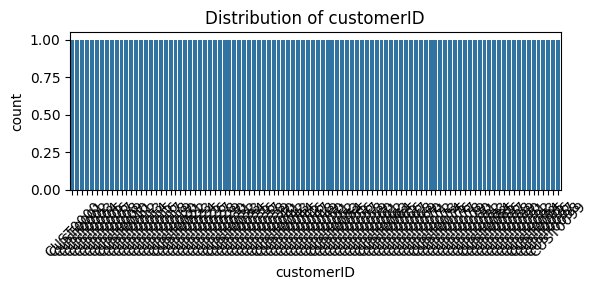

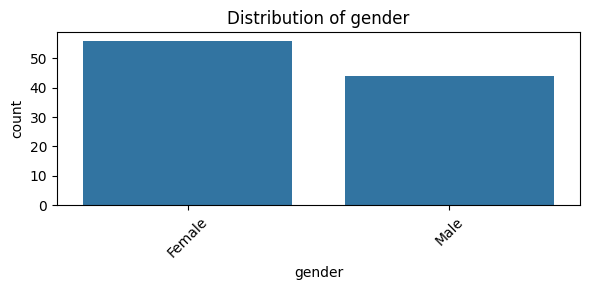

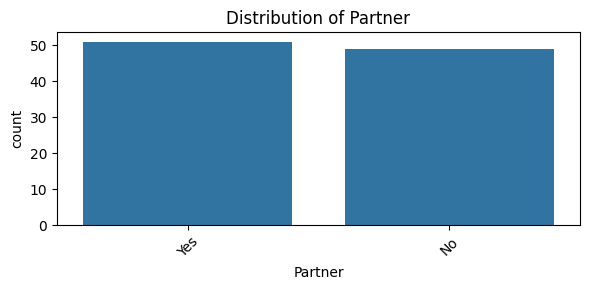

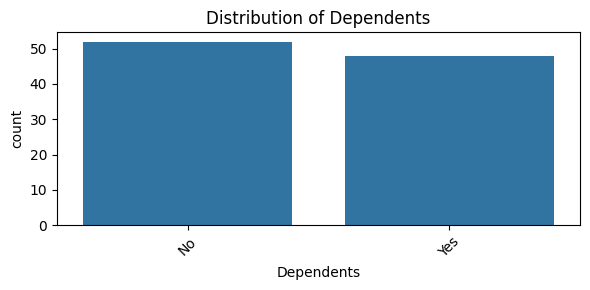

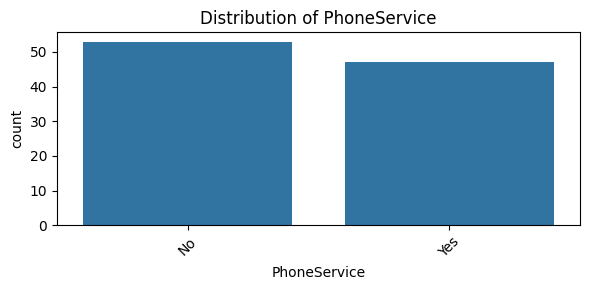

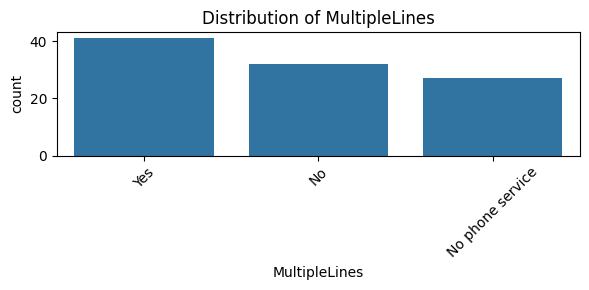

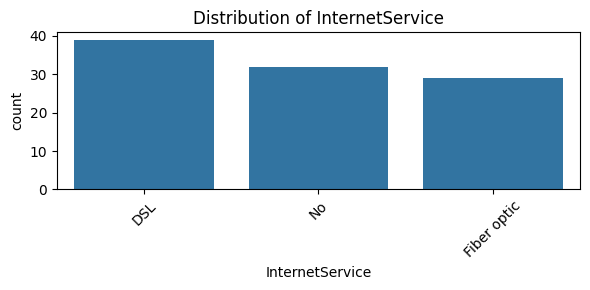

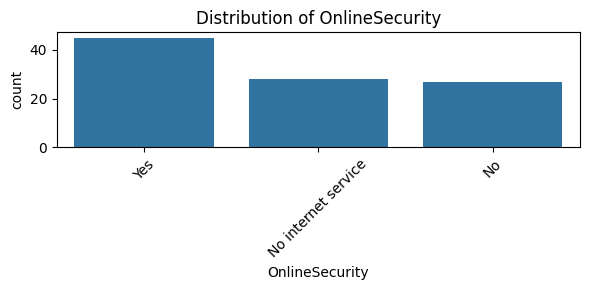

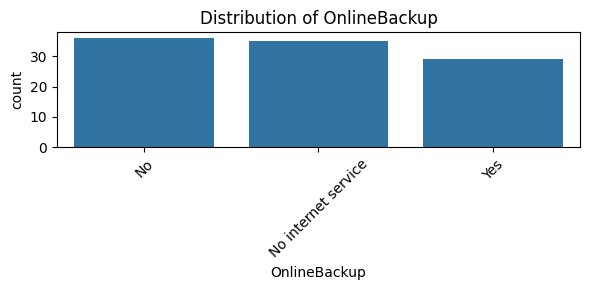

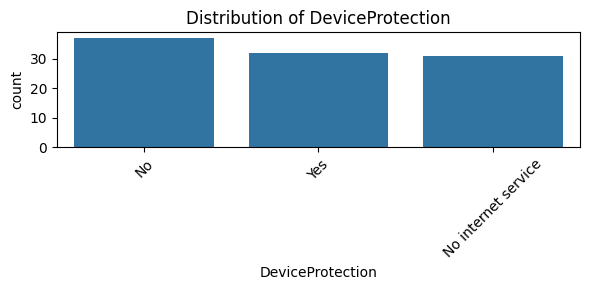

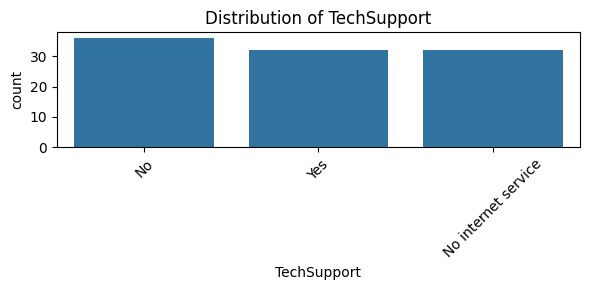

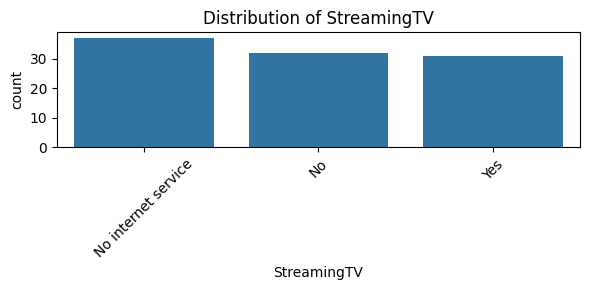

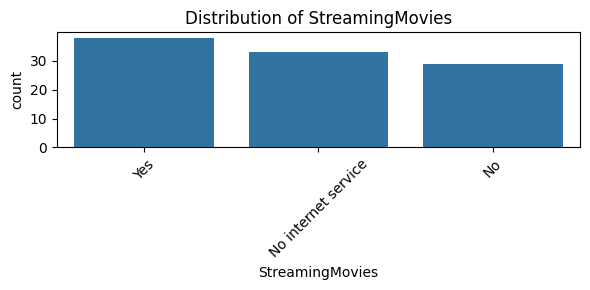

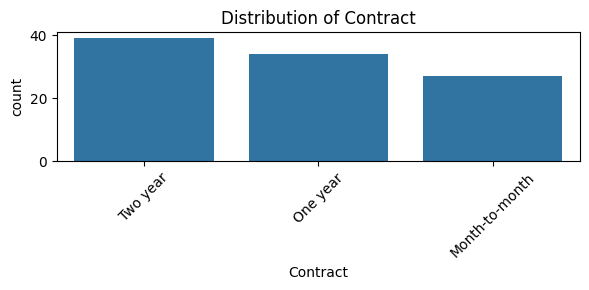

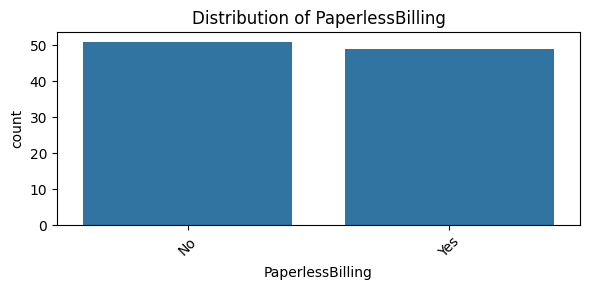

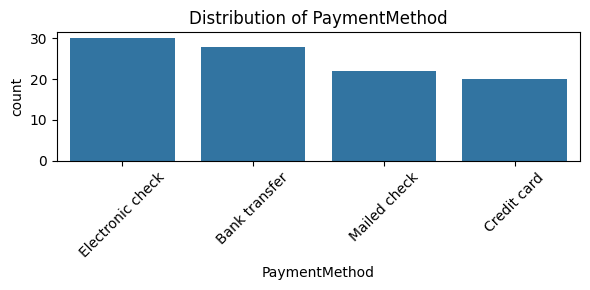

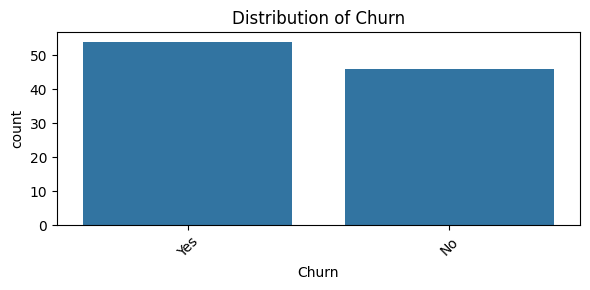

In [17]:
# Categorical columns (object type)
categorical_cols = df.select_dtypes(include='object').columns

# Plot count plots
import matplotlib.pyplot as plt
import seaborn as sns

for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


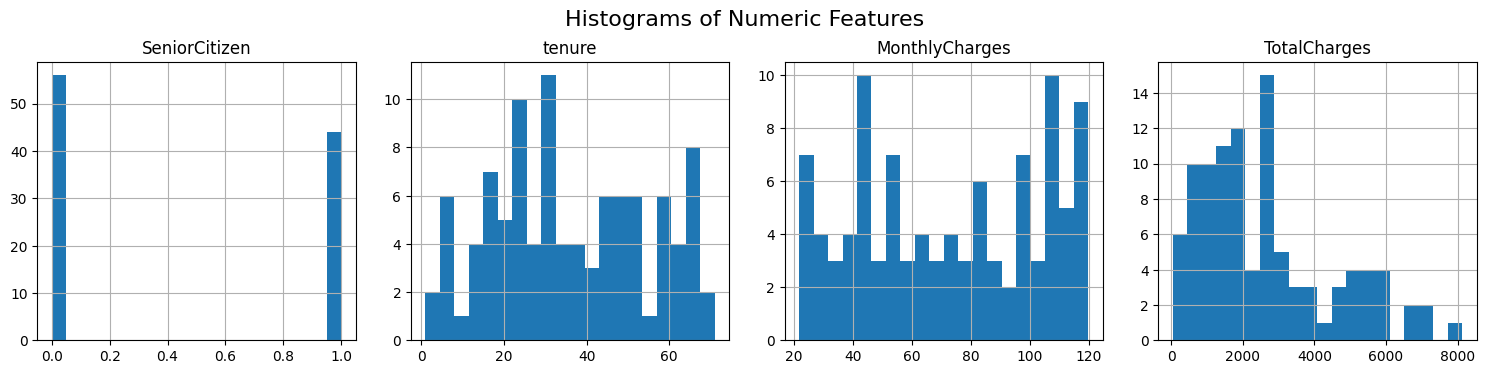

In [18]:
# Numerical columns
numerical_cols = df.select_dtypes(include='number').columns

# Plot histograms
df[numerical_cols].hist(bins=20, figsize=(15, 10), layout=(3, 4))
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


### 🔍 Churn Rate by Feature

This section explores how the churn rate varies across key categorical features. Understanding these patterns helps identify high-risk customer segments.


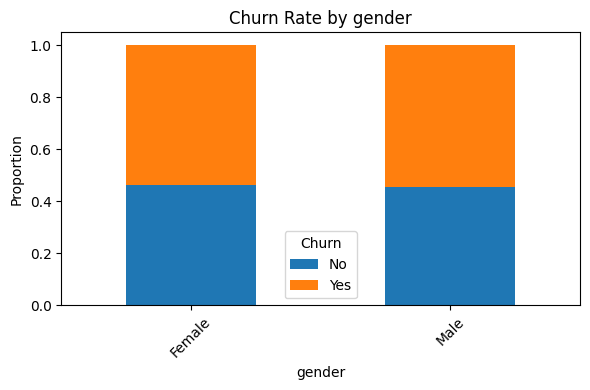

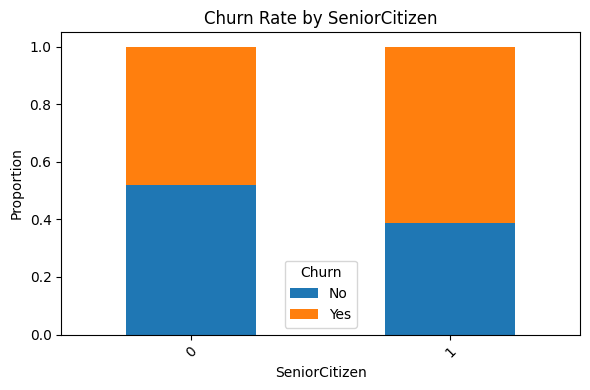

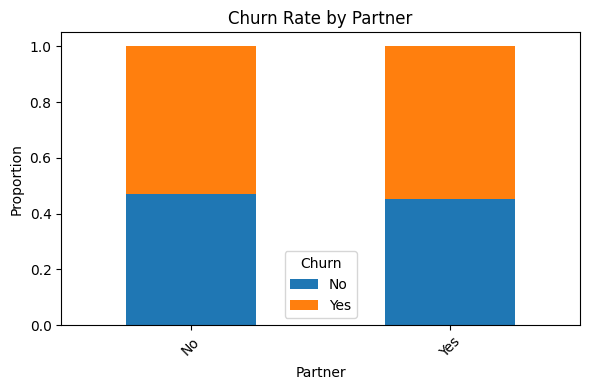

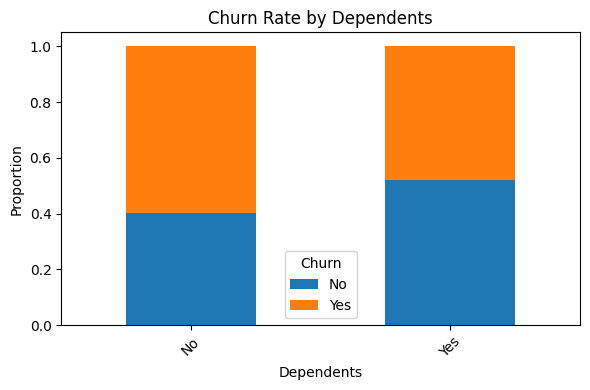

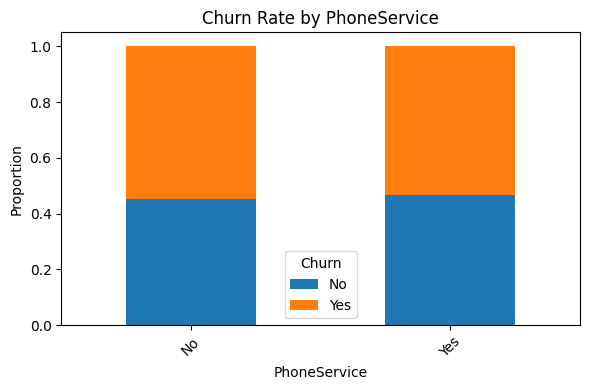

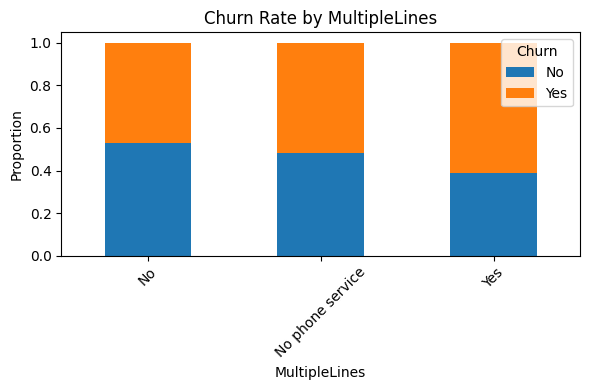

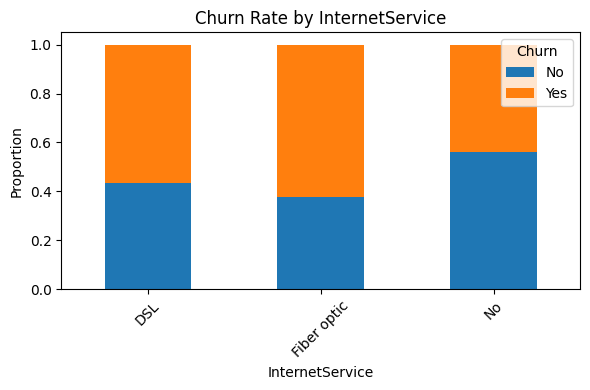

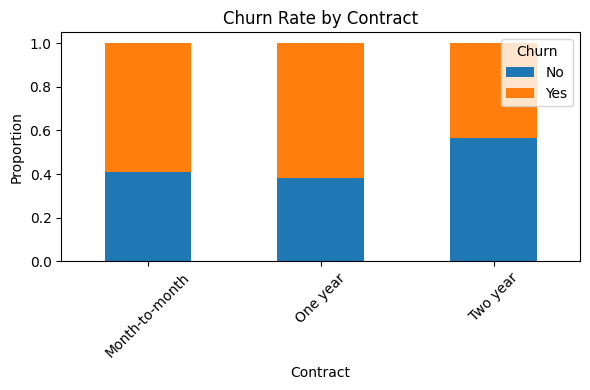

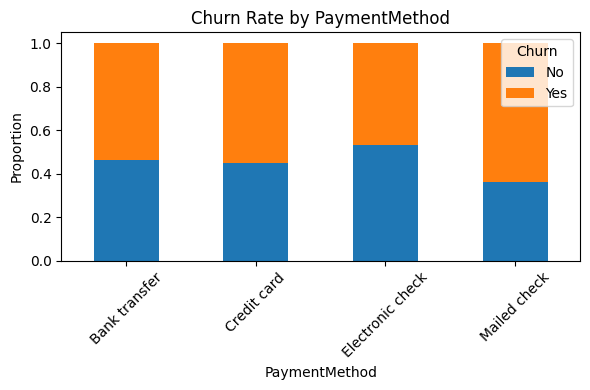

In [19]:
# List of categorical features to compare against churn
churn_target = 'Churn'
features_to_check = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                     'PhoneService', 'MultipleLines', 'InternetService', 
                     'Contract', 'PaymentMethod']

# Calculate and plot churn rate for each feature
for feature in features_to_check:
    churn_rate = df.groupby(feature)[churn_target].value_counts(normalize=True).unstack().fillna(0)
    
    churn_rate.plot(kind='bar', stacked=True, figsize=(6,4))
    plt.title(f'Churn Rate by {feature}')
    plt.ylabel('Proportion')
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend(title='Churn')
    plt.show()


## 🧾 Summary of Insights & Next Steps

This exploratory data analysis has revealed several important patterns in customer churn:

- 📊 Certain customer segments — such as those without partners, shorter tenure, and specific contract types — show higher churn rates.
- 🔍 Features like **Contract type**, **InternetService**, and **PaymentMethod** appear to have strong influence on churn behavior.
- ✅ No missing values were found, allowing us to proceed confidently with model training.
- 📉 Imbalanced distribution observed in some categorical variables, which might affect model performance.

### 🧠 Suggested Next Steps
1. **Feature Engineering**: Encode categorical variables (OneHot, LabelEncoder, etc.).
2. **Model Training**: Try algorithms like XGBoost, Random Forest, Logistic Regression.
3. **Evaluation**: Use metrics such as Accuracy, ROC-AUC, F1-score.
4. **Dashboarding**: Visualize churn predictors and segments using Power BI.

> This notebook lays the foundation for building a predictive churn model and designing strategies for customer retention.
